In [64]:
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np


In [65]:
class Generator(nn.Module):
    def __init__(self, z_dim=10, img_dim=784):
        super().__init__()
        self.gen = nn.Sequential(
        nn.Linear(z_dim, 256),
        nn.ReLU(),
        nn.Linear(256, img_dim),
        nn.Tanh(),
        )
    def forward(self, x):
        return self.gen(x) #return the gen object


In [66]:
# Discriminator Module
class Discriminator(nn.Module):
    def __init__(self, img_dim=784):
        super().__init__()
        self.disc = nn.Sequential(
            nn.Linear(img_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.disc(x)

In [67]:
# Hyperparameters
lr = 0.0001
z_dim = 64
image_dim = 28 * 28
batch_size = 128
num_epochs = 50

In [68]:
# Initialize Generator and Discriminator
gen = Generator(z_dim, image_dim)
disc = Discriminator(image_dim)

In [69]:
# Load MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataloader = DataLoader(
    datasets.MNIST('.', download=True, transform=transform),
    batch_size=batch_size, shuffle=True
)

Binary Cross Entropy loss is used as the loss function for both the Discriminator and the Generator. Adam optimizer is used for optimizing the parameters of both networks.

In [70]:
# Loss function and optimizers
criterion = nn.BCELoss()
opt_gen = torch.optim.Adam(gen.parameters(), lr=lr)
opt_disc = torch.optim.Adam(disc.parameters(), lr=lr)

Training loop alternates between training the Discriminator and the Generator. The Discriminator is trained to distinguish between real and fake images, while the Generator is trained to generate images that are indistinguishable from real images.

0


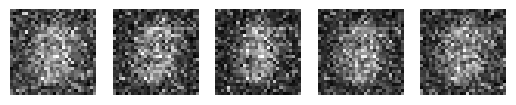

Epoch [0/50] Loss D: 0.4928, Loss G: 0.7707
1


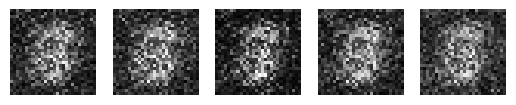

Epoch [1/50] Loss D: 0.4282, Loss G: 0.9943
2


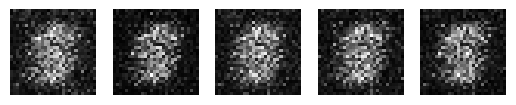

Epoch [2/50] Loss D: 0.6940, Loss G: 0.6596
3


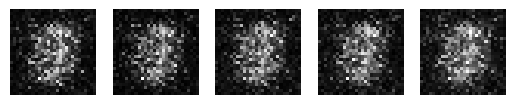

Epoch [3/50] Loss D: 0.6753, Loss G: 0.6934
4


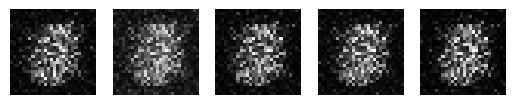

Epoch [4/50] Loss D: 0.6678, Loss G: 0.7469
5


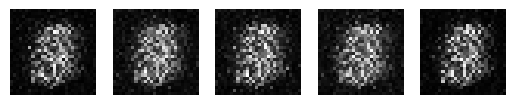

Epoch [5/50] Loss D: 0.5990, Loss G: 0.8358
6


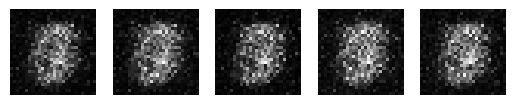

Epoch [6/50] Loss D: 0.6858, Loss G: 0.7084
7


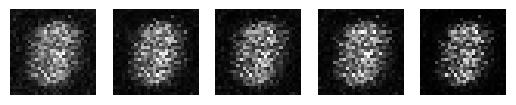

Epoch [7/50] Loss D: 0.5613, Loss G: 0.8571
8


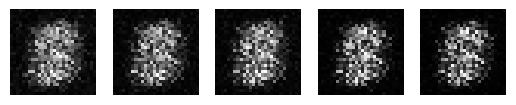

Epoch [8/50] Loss D: 0.6158, Loss G: 0.8826
9


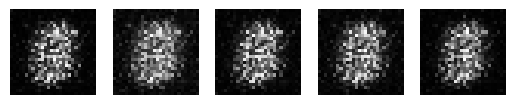

Epoch [9/50] Loss D: 0.6110, Loss G: 0.8656
10


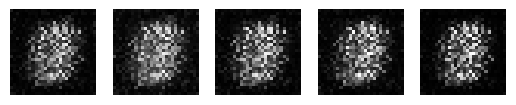

Epoch [10/50] Loss D: 0.4066, Loss G: 1.1347
11


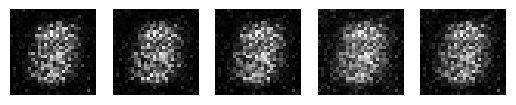

Epoch [11/50] Loss D: 0.4378, Loss G: 1.0800
12


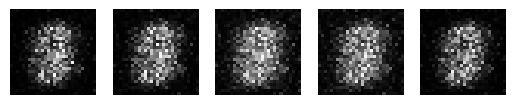

Epoch [12/50] Loss D: 0.5440, Loss G: 0.9037
13


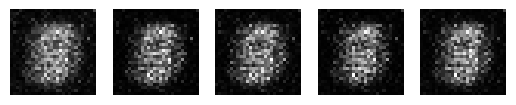

Epoch [13/50] Loss D: 0.6382, Loss G: 0.7638
14


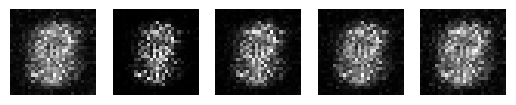

Epoch [14/50] Loss D: 0.5982, Loss G: 0.8181
15


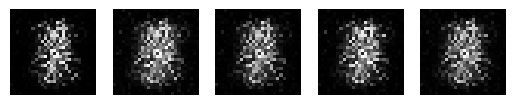

Epoch [15/50] Loss D: 0.5488, Loss G: 0.8999
16


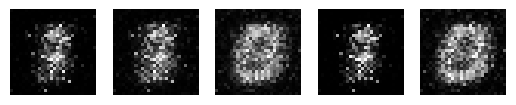

Epoch [16/50] Loss D: 0.4691, Loss G: 1.0104
17


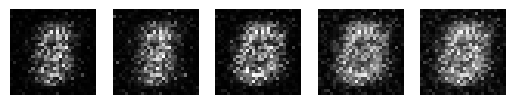

Epoch [17/50] Loss D: 0.5644, Loss G: 0.8817
18


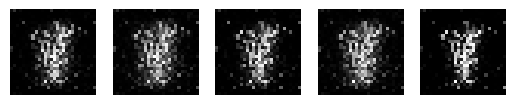

Epoch [18/50] Loss D: 0.4795, Loss G: 1.1841
19


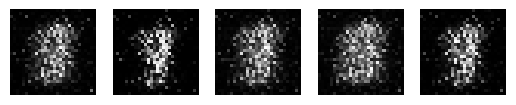

Epoch [19/50] Loss D: 0.4729, Loss G: 1.0618
20


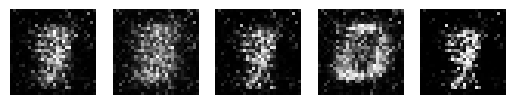

Epoch [20/50] Loss D: 0.3914, Loss G: 1.2305
21


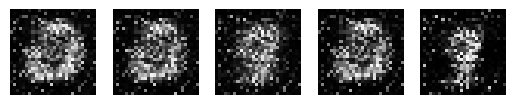

Epoch [21/50] Loss D: 0.3724, Loss G: 1.2790
22


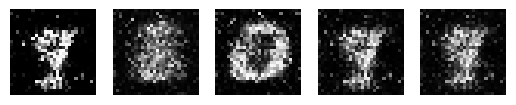

Epoch [22/50] Loss D: 0.5123, Loss G: 0.9754
23


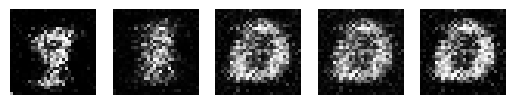

Epoch [23/50] Loss D: 0.5462, Loss G: 0.9905
24


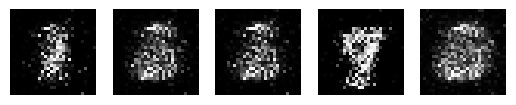

Epoch [24/50] Loss D: 0.5864, Loss G: 0.9762
25


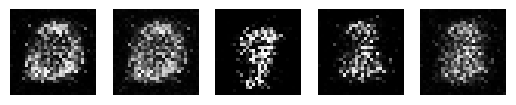

Epoch [25/50] Loss D: 0.5976, Loss G: 0.9254
26


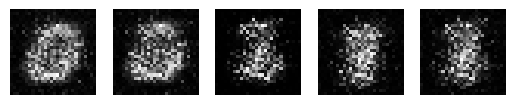

Epoch [26/50] Loss D: 0.4413, Loss G: 1.1281
27


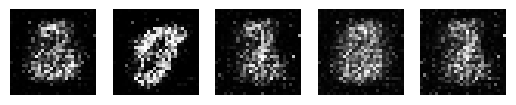

Epoch [27/50] Loss D: 0.4409, Loss G: 1.2092
28


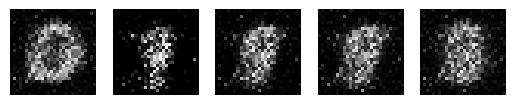

Epoch [28/50] Loss D: 0.4595, Loss G: 1.1538
29


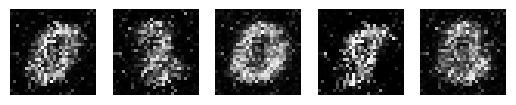

Epoch [29/50] Loss D: 0.4403, Loss G: 1.2527
30


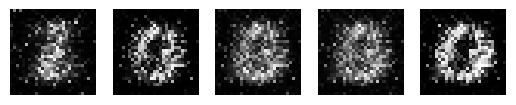

Epoch [30/50] Loss D: 0.3193, Loss G: 1.5382
31


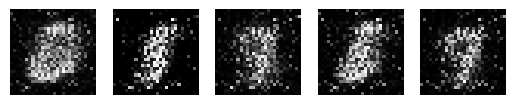

Epoch [31/50] Loss D: 0.4942, Loss G: 1.0611
32


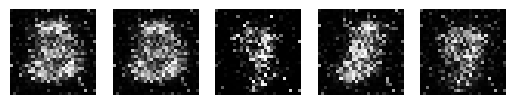

Epoch [32/50] Loss D: 0.4998, Loss G: 1.1179
33


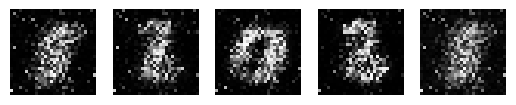

Epoch [33/50] Loss D: 0.4436, Loss G: 1.2246
34


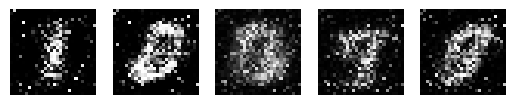

Epoch [34/50] Loss D: 0.3097, Loss G: 1.4308
35


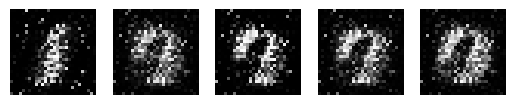

Epoch [35/50] Loss D: 0.4683, Loss G: 1.1696
36


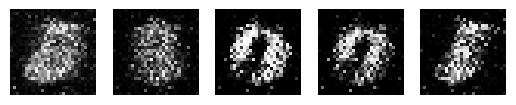

Epoch [36/50] Loss D: 0.4863, Loss G: 1.0408
37


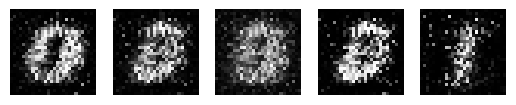

Epoch [37/50] Loss D: 0.5294, Loss G: 1.2478
38


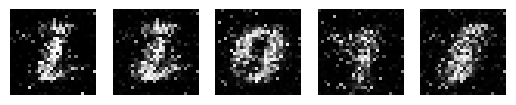

Epoch [38/50] Loss D: 0.4111, Loss G: 1.3763
39


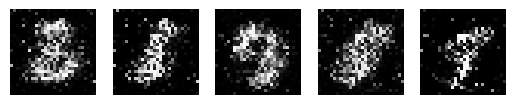

Epoch [39/50] Loss D: 0.4089, Loss G: 1.2517
40


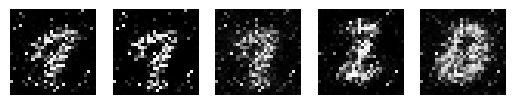

Epoch [40/50] Loss D: 0.4297, Loss G: 1.1835
41


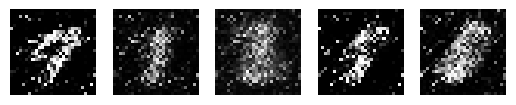

Epoch [41/50] Loss D: 0.3976, Loss G: 1.3281
42


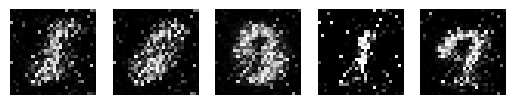

Epoch [42/50] Loss D: 0.3924, Loss G: 1.2910
43


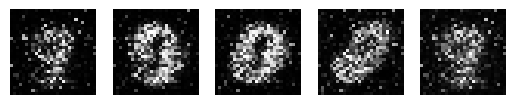

Epoch [43/50] Loss D: 0.4300, Loss G: 1.3303
44


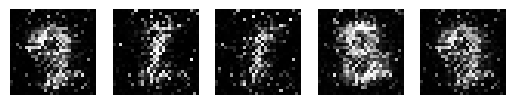

Epoch [44/50] Loss D: 0.3546, Loss G: 1.7544
45


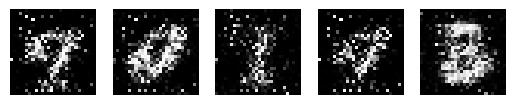

Epoch [45/50] Loss D: 0.3411, Loss G: 1.6087
46


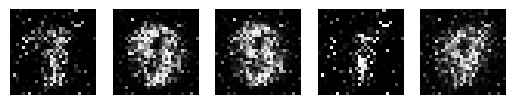

Epoch [46/50] Loss D: 0.2666, Loss G: 1.7842
47


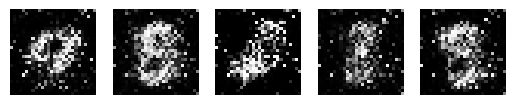

Epoch [47/50] Loss D: 0.3217, Loss G: 1.6320
48


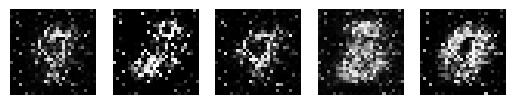

Epoch [48/50] Loss D: 0.2976, Loss G: 1.6130
49


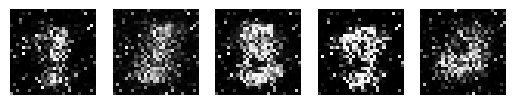

Epoch [49/50] Loss D: 0.2753, Loss G: 1.9064


In [71]:
# Training Loop
for epoch in range(num_epochs):
    print(epoch)
    for batch_idx, (real, _) in enumerate(dataloader):
        real = real.view(-1, 784)
        batch_size = real.shape[0]

        # Train Discriminator
        noise = torch.randn(batch_size, z_dim)
        fake = gen(noise)
        disc_real = disc(real).view(-1)
        lossD_real = criterion(disc_real, torch.ones_like(disc_real))
        disc_fake = disc(fake.detach()).view(-1)
        lossD_fake = criterion(disc_fake, torch.zeros_like(disc_fake))
        lossD = (lossD_real + lossD_fake) / 2
        disc.zero_grad()
        lossD.backward()
        opt_disc.step()

        # Train Generator
        output = disc(fake).view(-1)
        lossG = criterion(output, torch.ones_like(output))
        gen.zero_grad()
        lossG.backward()
        opt_gen.step()

    # Visualize generated images after each epoch
    with torch.no_grad():
        fake = gen(torch.randn(batch_size, z_dim)).view(-1, 28, 28).detach().cpu().numpy()
        fig, ax = plt.subplots(1, 5)
        for i in range(5):
            ax[i].imshow(fake[i], cmap='gray')
            ax[i].axis('off')
        plt.show()
        
        print(f"Epoch [{epoch}/{num_epochs}] Loss D: {lossD:.4f}, Loss G: {lossG:.4f}")

## Observations:

The quality of generated images improves gradually per epoch.

Initially, the generated images looks like random noise, but as training continues, they start to resemble handwritten digits more closely.

The loss values for both the Discriminator and Generator are printed after each epoch, enabling us to monitor the training process.

Since, we need to maximise generator loss and minimise discriminator loss, I tried changing learning rates and trained the model on 0.01, 0.001, 0.0002, 0.0001 and got the best resutlts at learning rate 0.0001.